<a href="https://colab.research.google.com/github/JIRUWANG1997/-keras-stacking-keras-with-tf2.0/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sample code

In [304]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2967 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1441 - accuracy: 0.9572
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1093 - accuracy: 0.9668
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0891 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9758
313/313 - 0s - loss: 0.0824 - accuracy: 0.9754


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.32630287e-08, 4.73911435e-08, 5.77989886e-06, 1.02340034e-03,
        1.49658584e-11, 6.21373673e-08, 3.23945189e-13, 9.98962402e-01,
        6.02437808e-07, 7.62699301e-06],
       [7.52918261e-09, 1.00740217e-05, 9.99942541e-01, 4.72317297e-05,
        1.06826062e-16, 2.07247311e-07, 7.23406890e-11, 2.97387847e-14,
        5.07540499e-08, 1.58706788e-13],
       [9.35022911e-07, 9.98869002e-01, 1.06165302e-04, 6.85761333e-05,
        3.66087988e-05, 3.23258109e-06, 9.15896726e-06, 8.61397129e-04,
        4.41215961e-05, 7.40597841e-07],
       [9.99366224e-01, 7.30630836e-06, 4.19098535e-04, 6.64026174e-06,
        5.82192001e-08, 7.46325895e-05, 1.06518004e-04, 1.36321069e-05,
        1.48977836e-06, 4.46024205e-06],
       [2.39175224e-05, 1.42523923e-10, 7.77342484e-06, 2.14112873e-07,
        9.87623572e-01, 3.15035618e-06, 7.69613180e-05, 3.19402643e-05,
        7.30328247e-05, 1.21594518e-02]], dtype=float32)>

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.2367746e-07, 1.8729862e-09, 2.5051955e-05, 9.5165837e-05,
        9.3222097e-10, 2.2483352e-06, 2.8101466e-13, 9.9986076e-01,
        1.0148378e-05, 6.4695296e-06],
       [2.1553406e-09, 3.8396367e-05, 9.9995553e-01, 5.4438619e-06,
        9.8279422e-16, 1.5440030e-07, 2.2692070e-08, 2.9833591e-14,
        4.3942455e-07, 6.0615047e-14],
       [5.4146761e-07, 9.9852681e-01, 3.1582775e-05, 4.7400981e-06,
        7.0340138e-05, 1.1511768e-05, 3.6368332e-05, 9.2734164e-04,
        3.8933728e-04, 1.4934994e-06],
       [9.9985385e-01, 9.7978194e-09, 1.2761656e-04, 3.1325479e-07,
        6.6936243e-09, 1.0059260e-06, 2.2172953e-06, 1.3213050e-05,
        4.7675678e-07, 1.2648077e-06],
       [2.6168602e-06, 4.2324905e-07, 1.7644874e-05, 5.9223925e-07,
        9.3812501e-01, 6.9801440e-06, 4.3912187e-06, 1.4851654e-03,
        7.0428010e-05, 6.0286772e-02]], dtype=float32)>

# Untargeted FGS method

In [180]:
import tensorflow as tf

In [325]:
class FGSM(object):
  def __init__(self, data_x,data_y):
    self.data_x = data_x
    self.data_y = data_y
  def Non_target_fgsm(self,parameter):
    x_tensor = tf.convert_to_tensor(self.data_x, dtype=tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      output = model(x_tensor)
      loss_grad = loss_fn(self.data_y,output)
    gradients = tape.gradient(loss_grad,x_tensor)
    gradients_sign = tf.sign(gradients)
    gradients_sign = np.array(gradients_sign)
    x_test_new = self.data_x + parameter * gradients_sign
    x_test_new = np.clip(x_test_new,np.min(self.data_x), np.max(self.data_x))
    return x_test_new
  def Target_fgsm(self,parameter):
    x_tensor = tf.convert_to_tensor(self.data_x, dtype=tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      output = model(x_tensor)
      loss_grad = loss_fn((self.data_y+1)%10,output)
    gradients = tape.gradient(loss_grad,x_tensor)
    gradients_sign = tf.sign(gradients)
    gradients_sign = np.array(gradients_sign)
    x_test_new = self.data_x - parameter * gradients_sign
    x_test_new = np.clip(x_test_new,np.min(self.data_x), np.max(self.data_x))
    return x_test_new

313/313 [==============================] - 0s 1ms/step - loss: 10.7089 - accuracy: 0.0189


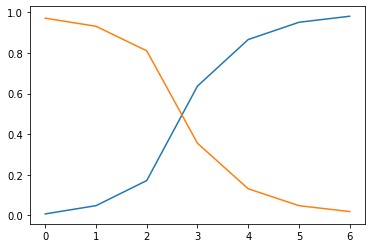

In [277]:
global parameters
if __name__ == "__main__":
  output = np.array(probability_model(x_test))
  res = np.argmax(output,axis=1).tolist()
  y_test.tolist()
  c = 0
  right_index = []
  for i in range(len(res)):
    if res[i] == y_test[i]:
      c += 1
      right_index.append(i)
  parameters = [1, 5, 10, 20, 30, 40, 50]
  U_F = FGSM(x_test,y_test)
  pre_acc = []
  c = 0
  success_rate = []
  for parameter in parameters:
    x_new = U_F.Non_target_fgsm(parameter/255)
    pre_acc.append(model.evaluate(x_new,y_test)[1])
    out_new = np.array(probability_model(x_new))
    output_new = np.argmax(out_new,axis=1).tolist()
    c = 0
    for i in right_index:
      if output_new[i] != y_test[i]:
        c += 1
    success_rate.append(c/len(right_index))
  import matplotlib.pyplot as plt
  plt.plot(success_rate)
  plt.plot(pre_acc)
  plt.show()


# Targeted FGS method

313/313 [==============================] - 0s 1ms/step - loss: 88.7350 - accuracy: 0.0000e+00


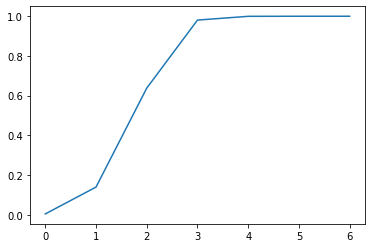

In [326]:
global parameters
if __name__ == "__main__":
  output = np.array(probability_model(x_test))
  res = np.argmax(output,axis=1).tolist()
  y_test.tolist()
  c = 0
  right_index = []
  for i in range(len(res)):
    if res[i] == y_test[i]:
      c += 1
      right_index.append(i)
  parameters = [1, 5, 10, 20, 30, 40, 50]
  T_F = FGSM(x_test,y_test)
  pre_acc = []
  c = 0
  success_rate = []
  for parameter in parameters:
    x_new = T_F.Target_fgsm(parameter/255)
    pre_acc.append(model.evaluate(x_new,y_test)[1])
    out_new = np.array(probability_model(x_new))
    output_new = np.argmax(out_new,axis=1).tolist()
    c = 0
    for i in right_index:
      if output_new[i] != y_test[i]:
        c += 1
    success_rate.append(c/len(right_index))
  import matplotlib.pyplot as plt

  plt.plot(success_rate)
  plt.show()

# Adversarial Retraining against Untargeted FGSM Attacks

In [327]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0895 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9761
313/313 - 0s - loss: 0.0737 - accuracy: 0.9775


[0.07372163236141205, 0.9775000214576721]

In [328]:
def perturbs(parameter,data_x,data_y):
    x_tensor = tf.convert_to_tensor(data_x, dtype=tf.float32)
    with tf.GradientTape() as tape:
      tape.watch(x_tensor)
      output = model(x_tensor)
      loss_grad = loss_fn(data_y,output)
    gradients = tape.gradient(loss_grad,x_tensor)
    gradients_sign = tf.sign(gradients)
    gradients_sign = np.array(gradients_sign)
    x_test_new = data_x + parameter * gradients_sign
    x_test_new = np.clip(x_test_new,np.min(data_x), np.max(data_x))
    return x_test_new

In [329]:
x_add = perturbs (10/255,x_train,y_train)
x_train1 = np.concatenate((x_train, x_add), axis=0)
y_train1 = np.concatenate((y_train, y_train), axis=0)

In [330]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train1, y_train1, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2037 - accuracy: 0.9415
Epoch 2/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0815 - accuracy: 0.9752
Epoch 3/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0585 - accuracy: 0.9815
Epoch 4/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0472 - accuracy: 0.9849
Epoch 5/5
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0416 - accuracy: 0.9867
313/313 - 0s - loss: 0.0826 - accuracy: 0.9749


[0.08258301019668579, 0.9749000072479248]

In [331]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

313/313 [==============================] - 0s 1ms/step - loss: 91.3914 - accuracy: 5.0000e-04


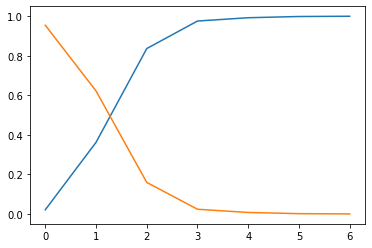

In [332]:
global parameters
if __name__ == "__main__":
  output = np.array(probability_model(x_test))
  res = np.argmax(output,axis=1).tolist()
  y_test.tolist()
  c = 0
  right_index = []
  for i in range(len(res)):
    if res[i] == y_test[i]:
      c += 1
      right_index.append(i)
  parameters = [1, 5, 10, 20, 30, 40, 50]
  U_F = FGSM(x_test,y_test)
  pre_acc = []
  c = 0
  success_rate = []
  for parameter in parameters:
    x_new = U_F.Non_target_fgsm(parameter/255)
    pre_acc.append(model.evaluate(x_new,y_test)[1])
    out_new = np.array(probability_model(x_new))
    output_new = np.argmax(out_new,axis=1).tolist()
    c = 0
    for i in right_index:
      if output_new[i] != y_test[i]:
        c += 1
    success_rate.append(c/len(right_index))
  import matplotlib.pyplot as plt
  plt.plot(success_rate)
  plt.plot(pre_acc)
  plt.show()

In [323]:
success_rate

[0.01924257932446264,
 0.33961105424769705,
 0.8324462640736949,
 0.9757420675537359,
 0.9960081883316274,
 0.9991811668372569,
 0.9997952917093142]